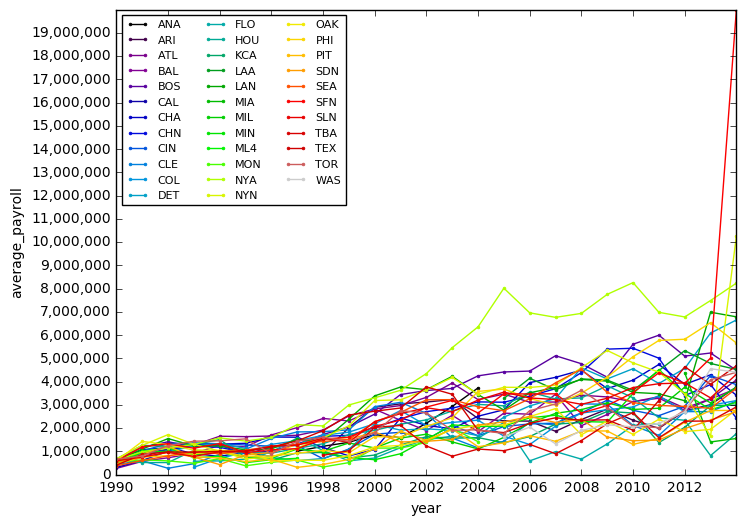

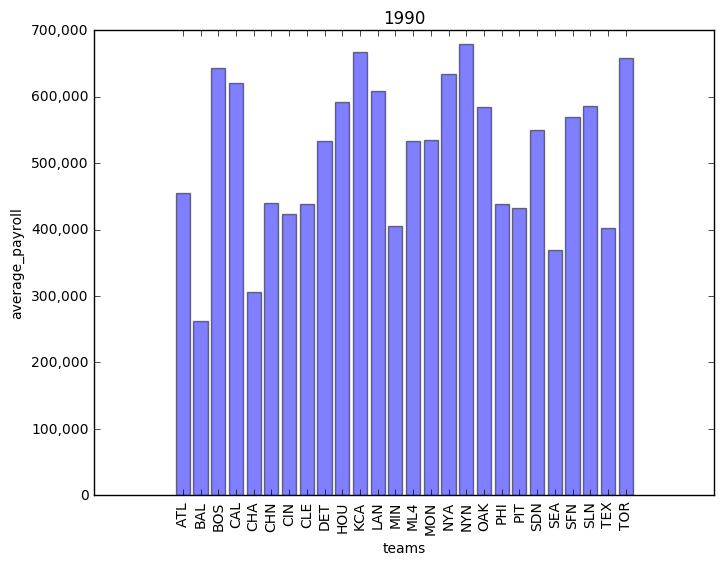

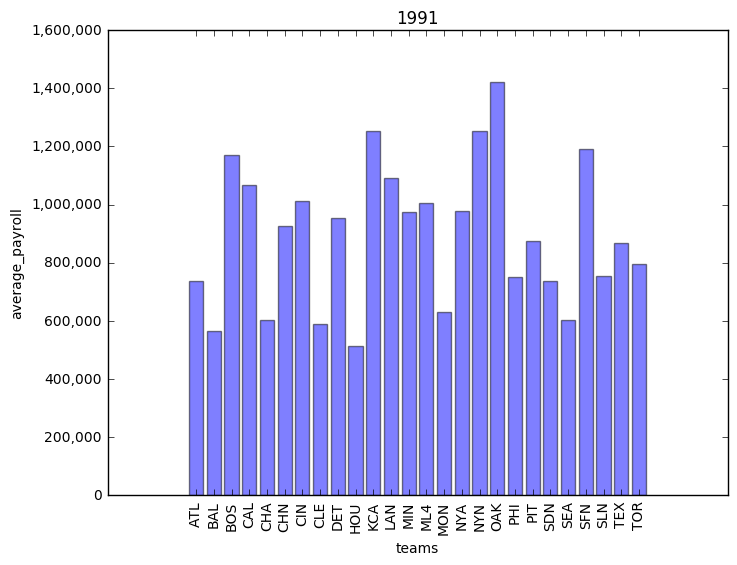

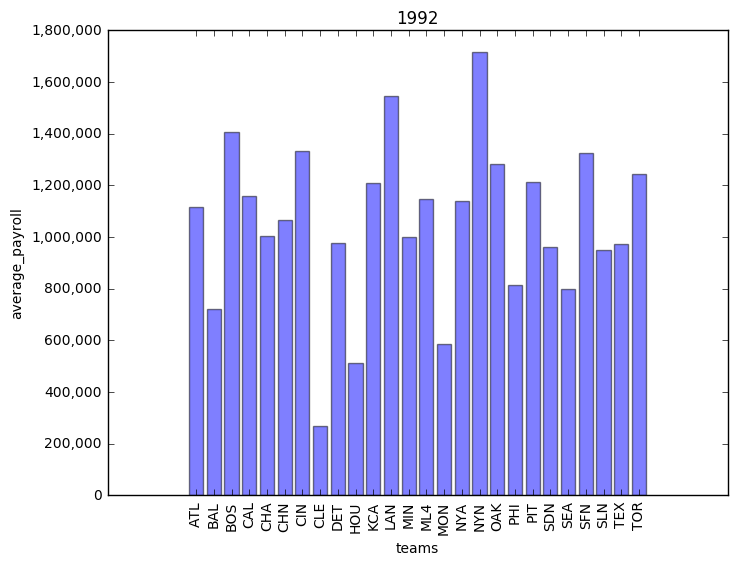

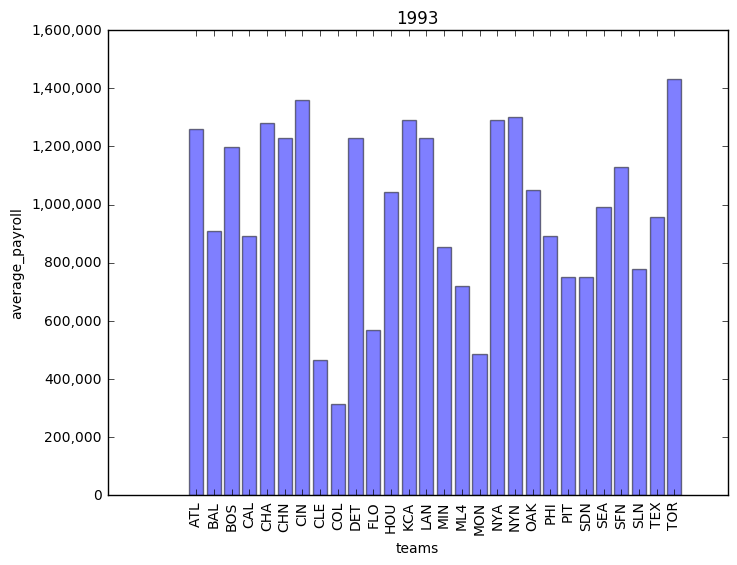

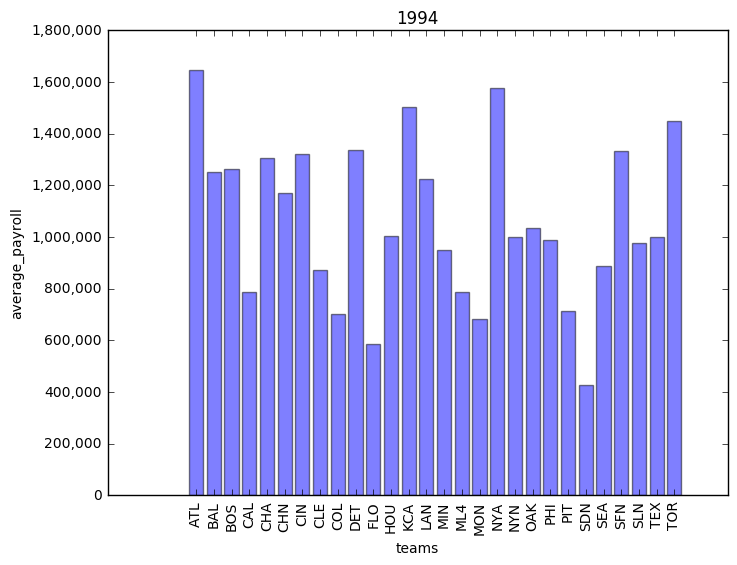

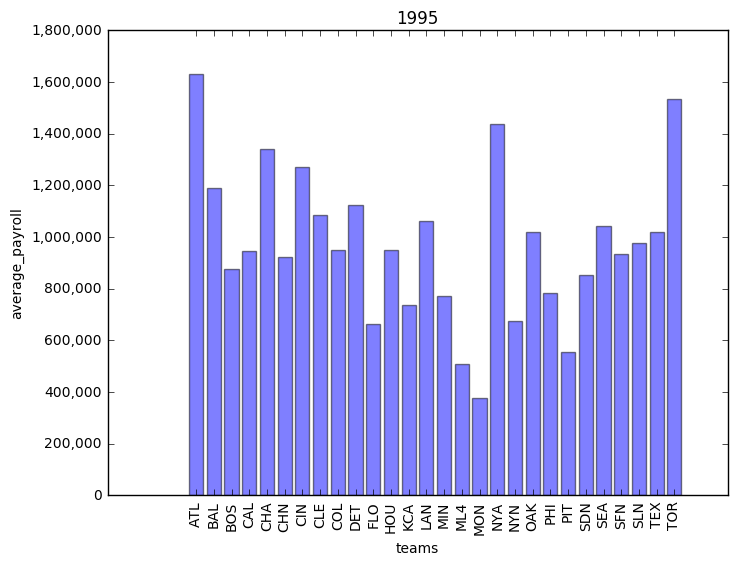

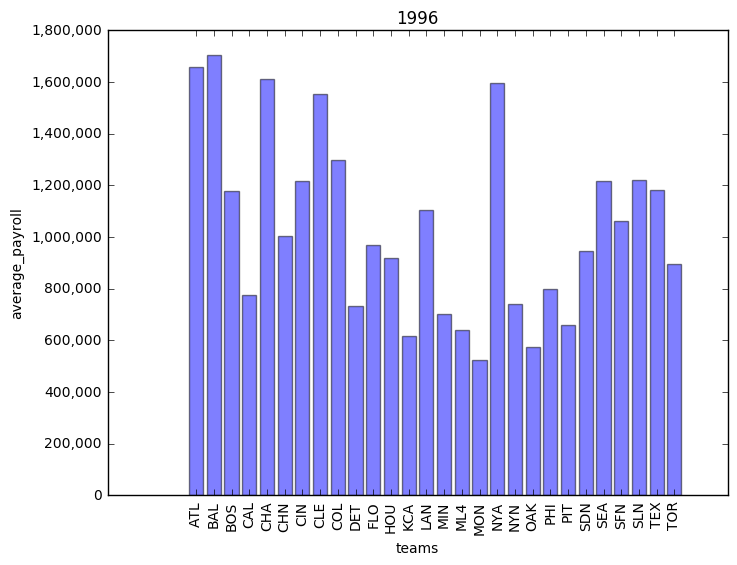

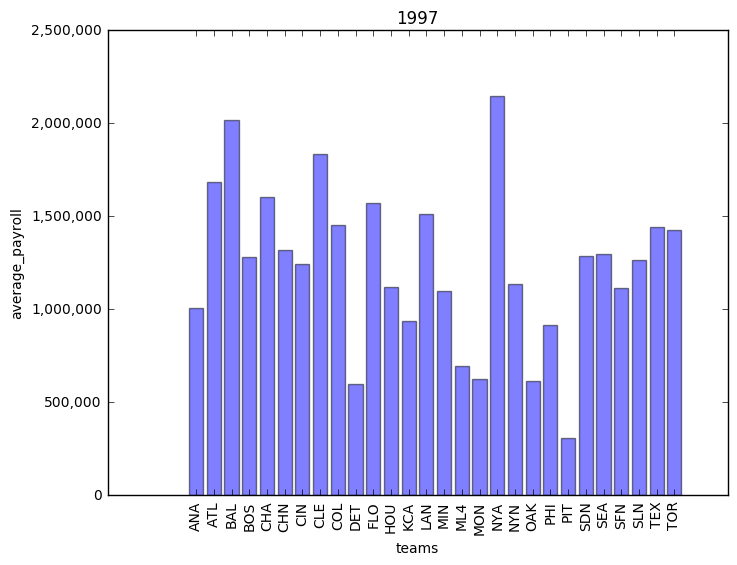

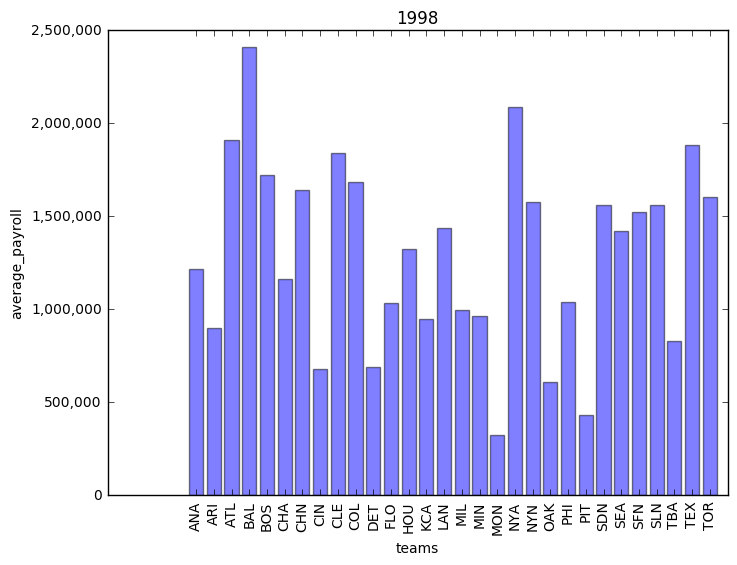

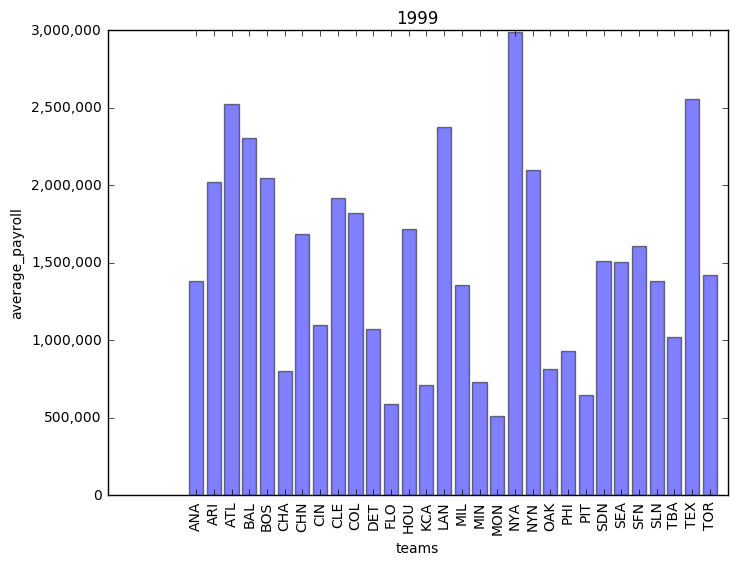

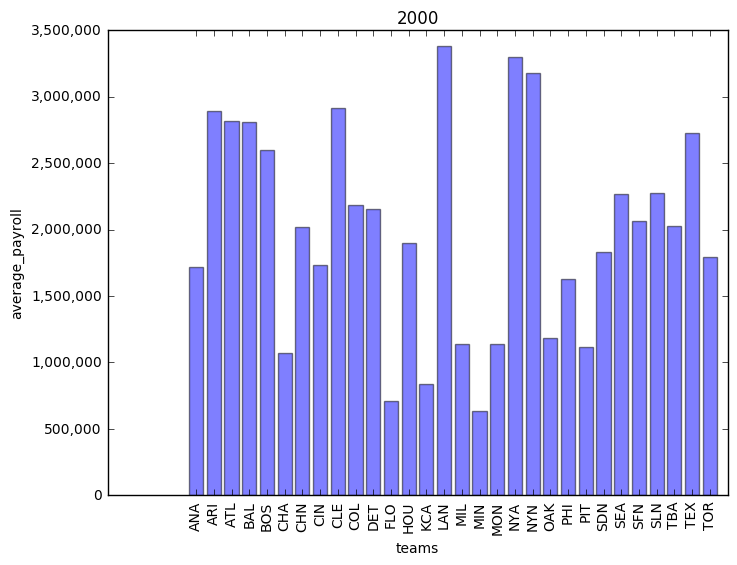

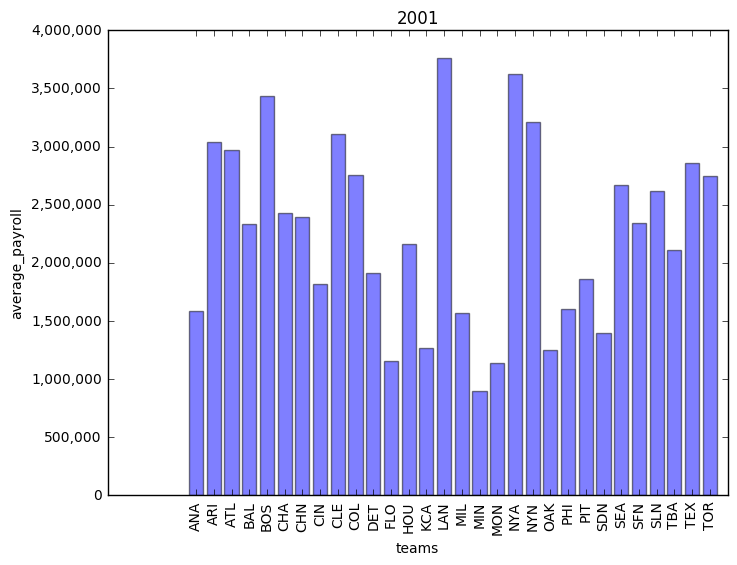

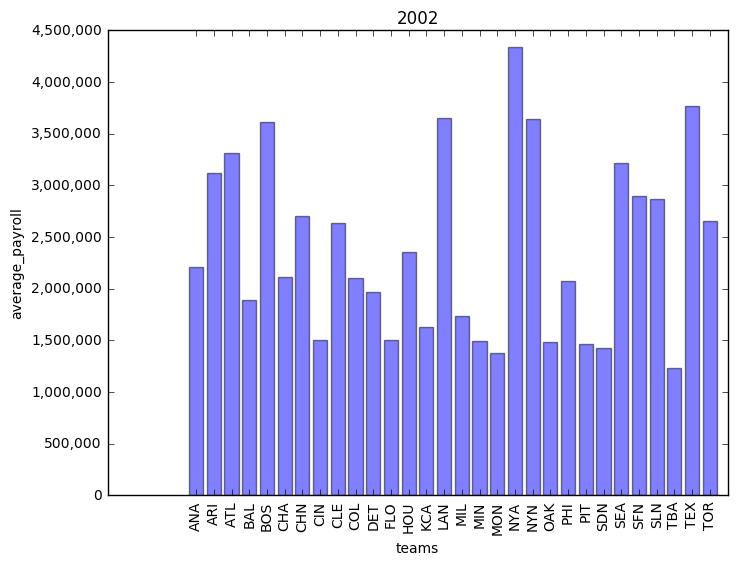

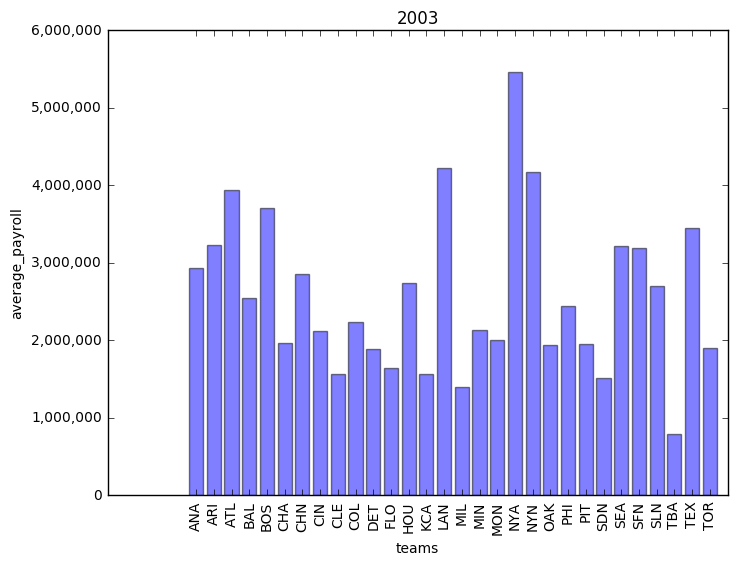

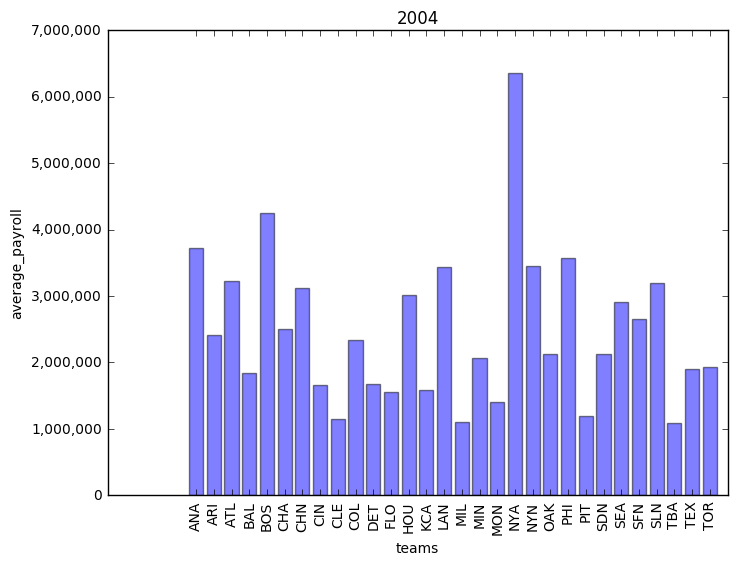

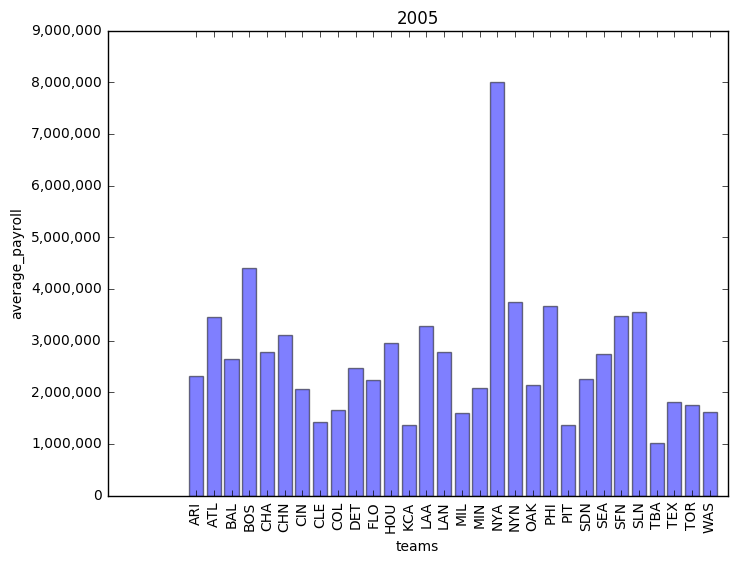

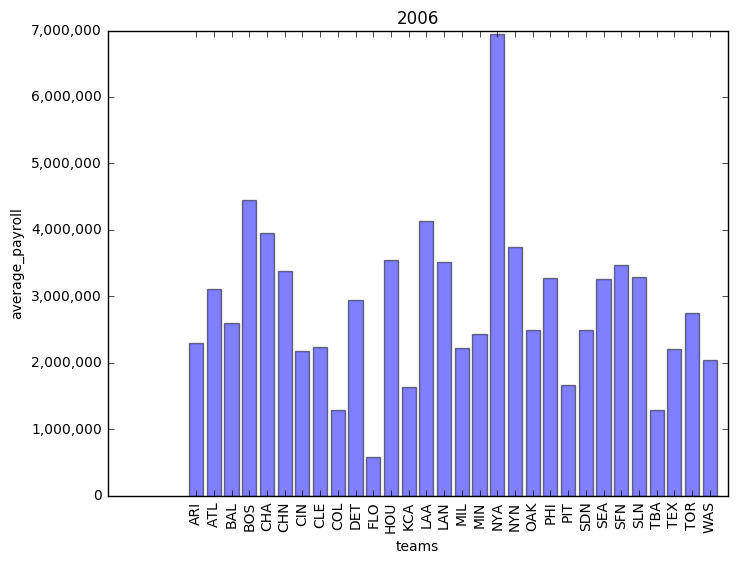

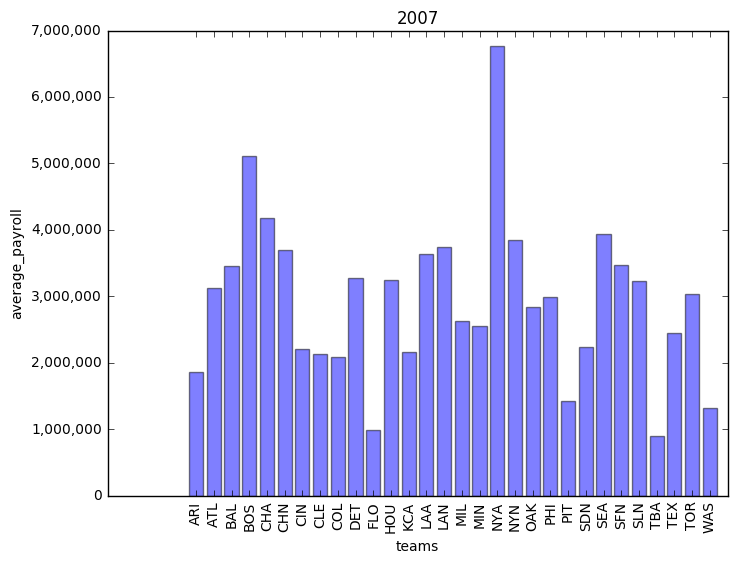

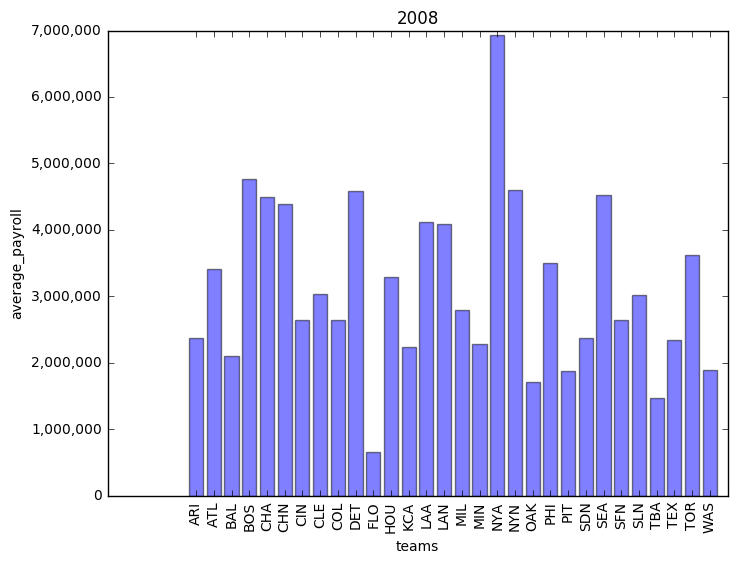

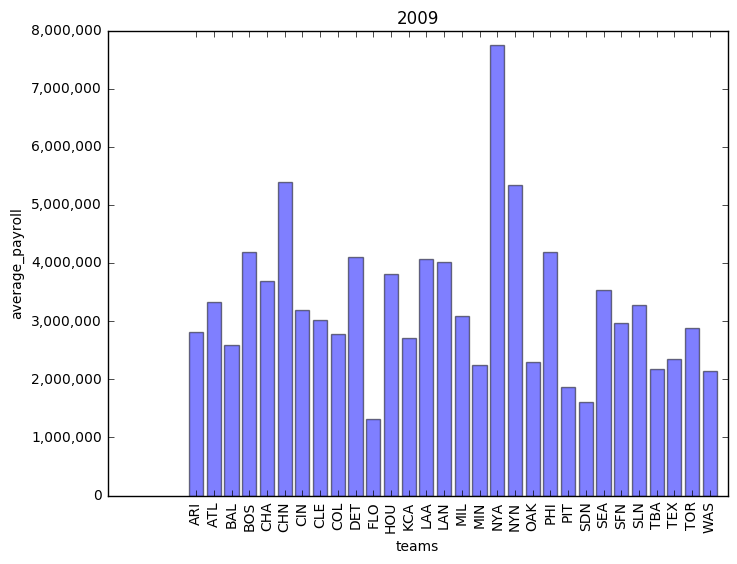

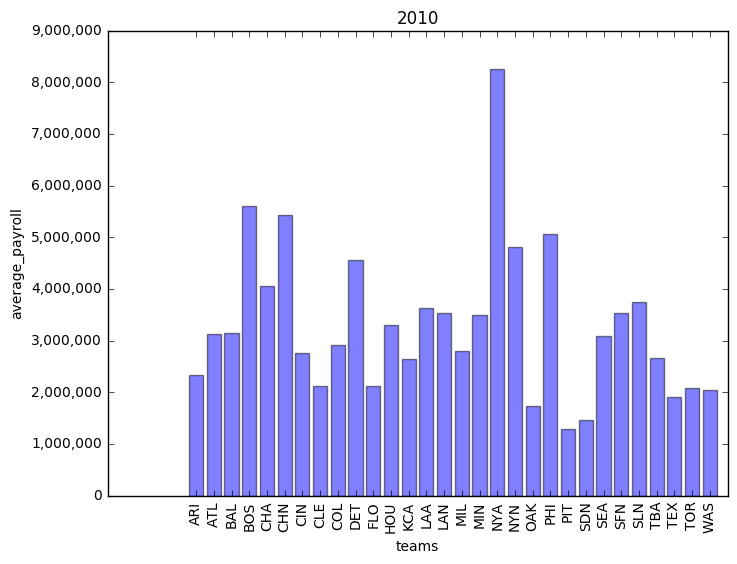

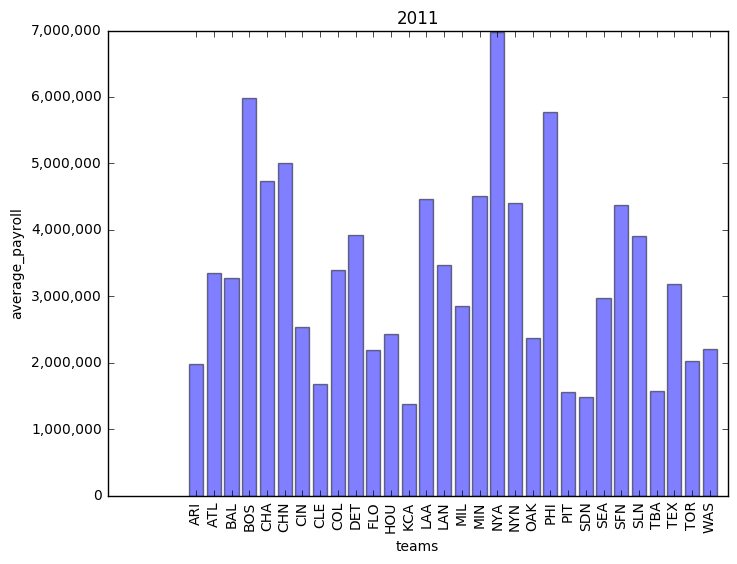

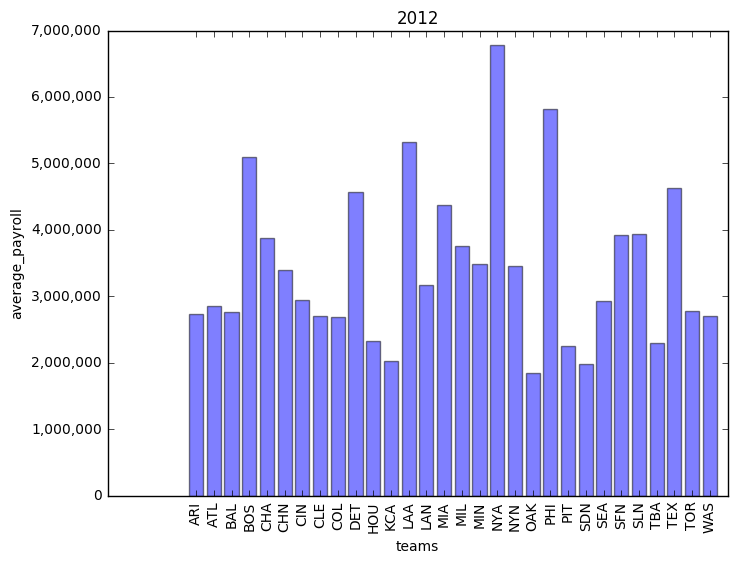

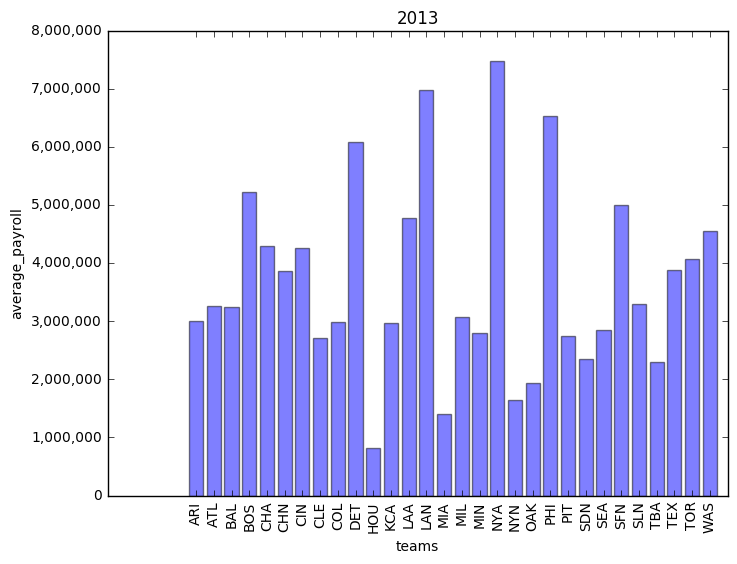

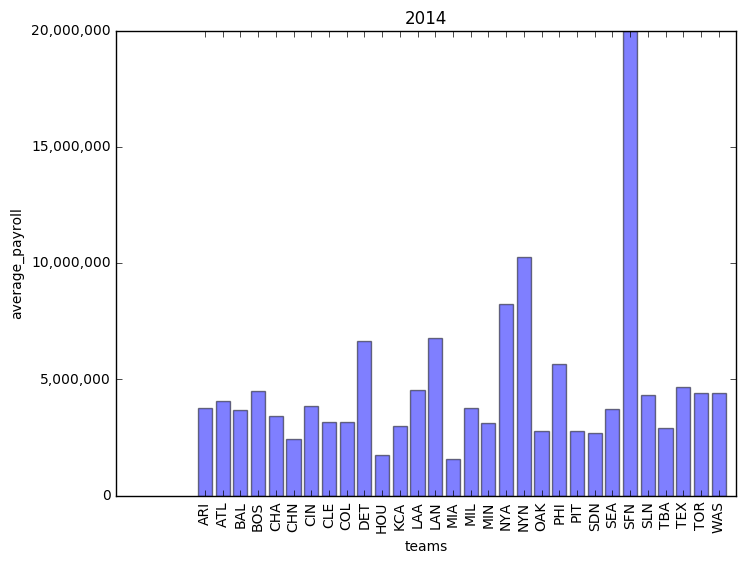

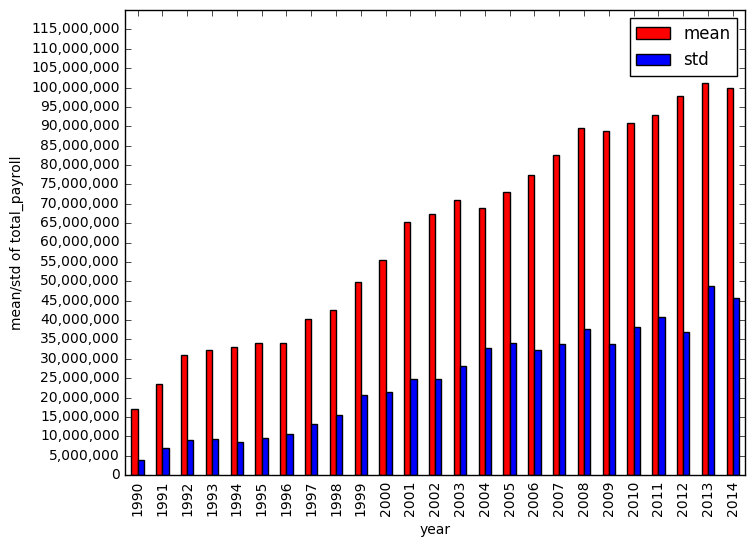

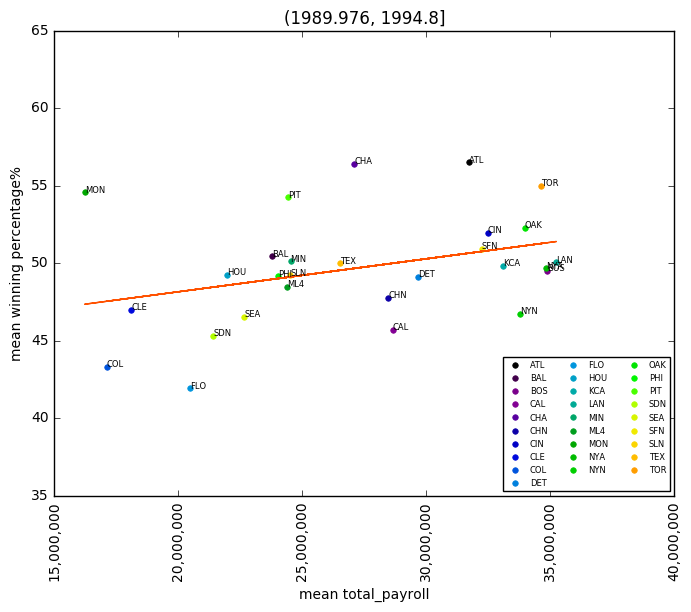

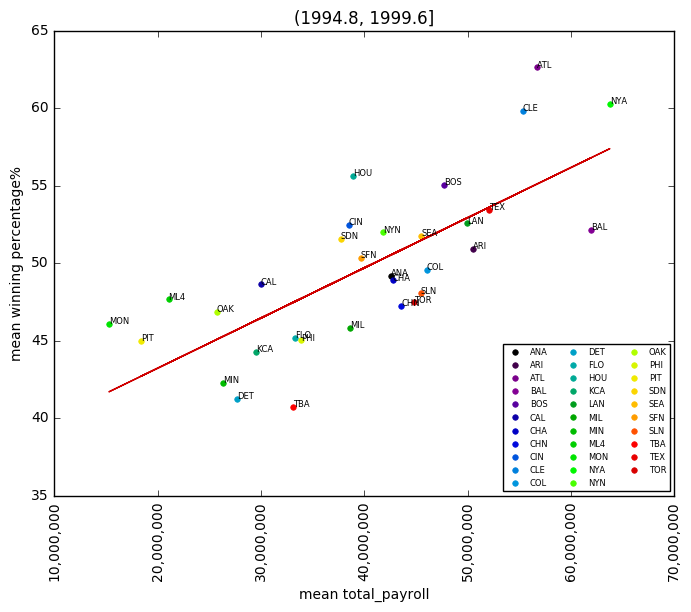

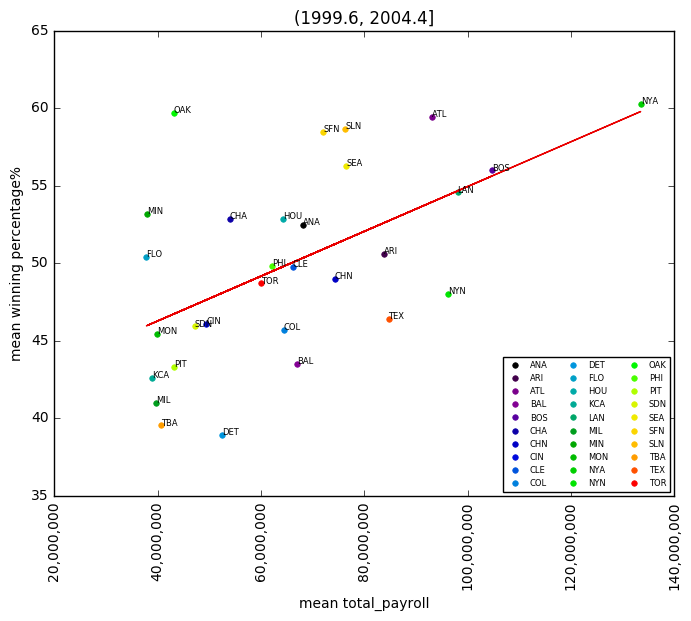

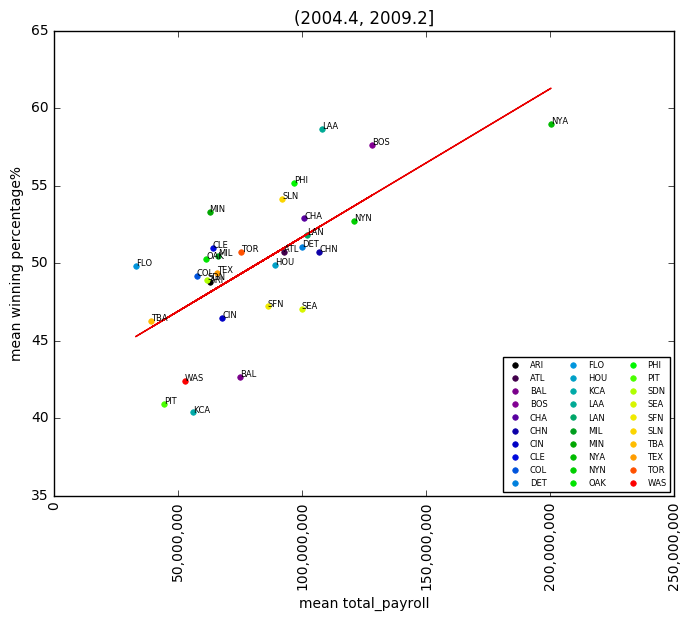

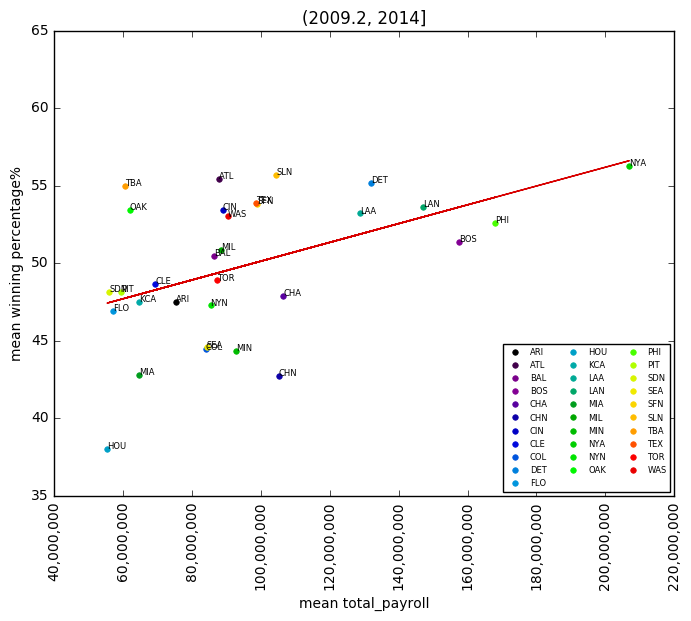

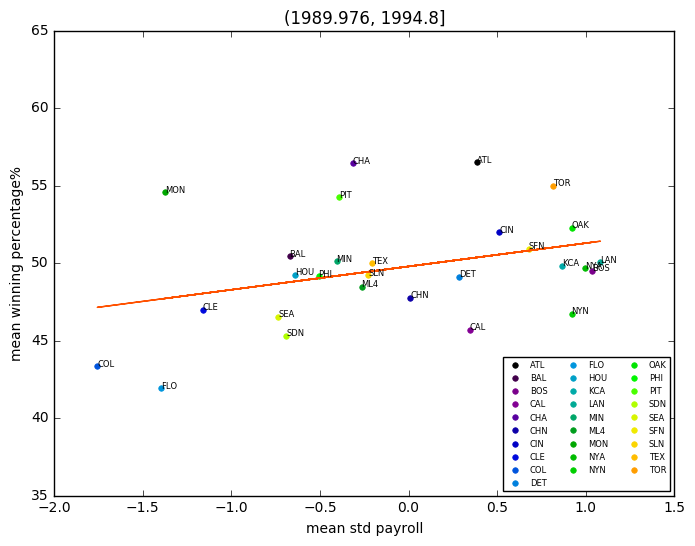

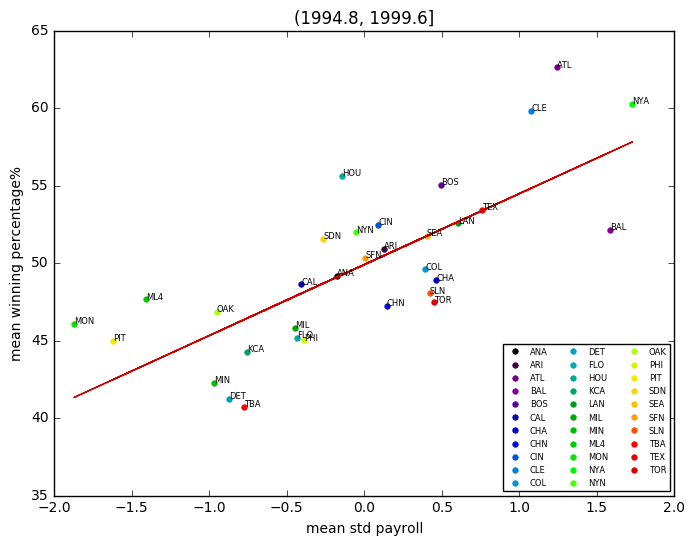

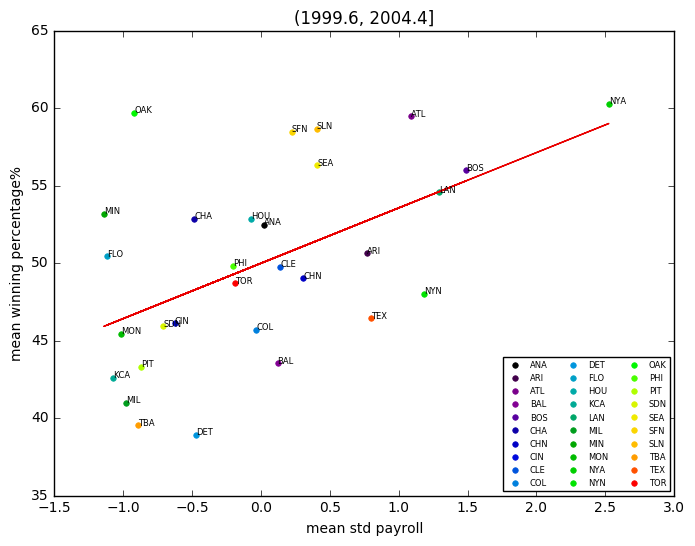

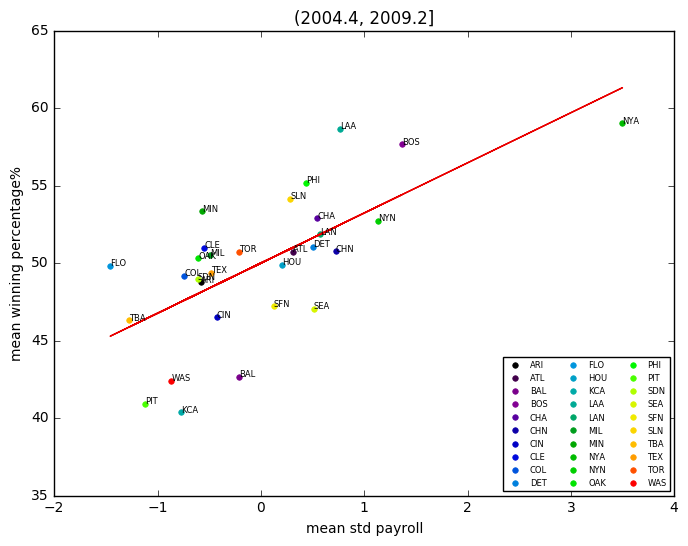

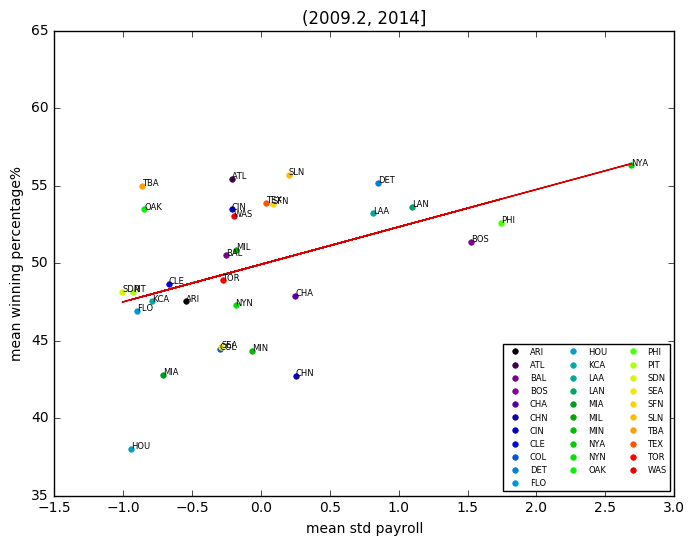

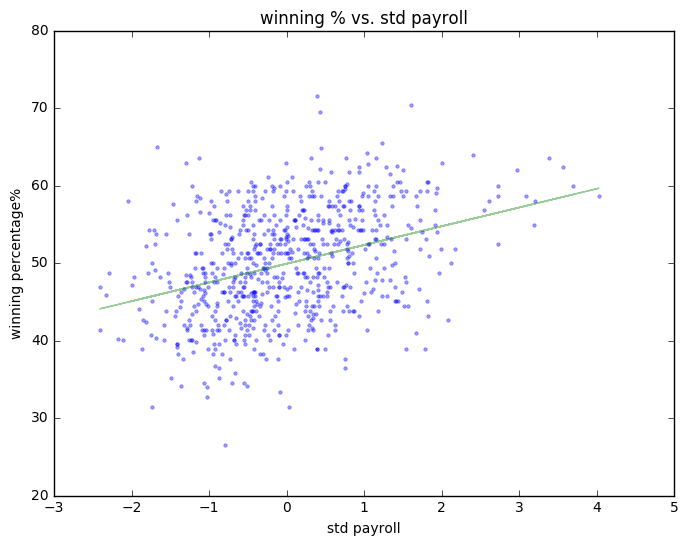

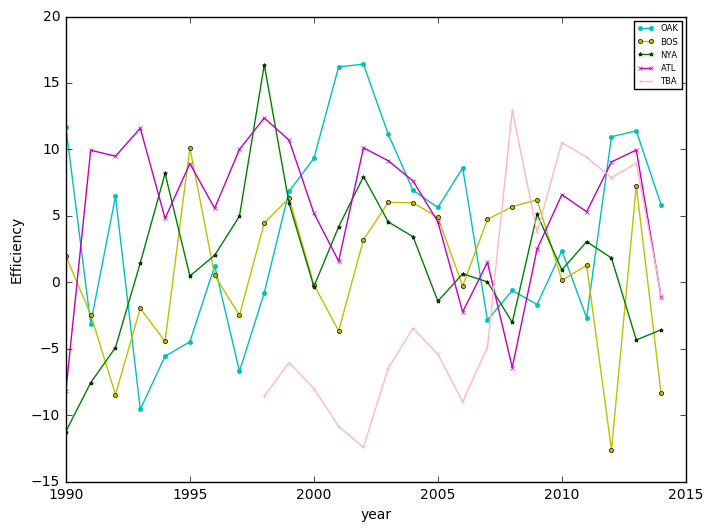

     yearID teamID    G    W franchID      win_p  total_payroll          discr_year  std_payroll  efficiency
130    1990    ATL  162   65      ATL  40.123457     14555501.0  (1989.976, 1994.8]    -0.680490   -8.175318
131    1990    BAL  161   76      BAL  47.204969      9680084.0  (1989.976, 1994.8]    -1.998674    2.201653
132    1990    BOS  162   88      BOS  54.320988     20558333.0  (1989.976, 1994.8]     0.942516    1.964697
133    1990    CAL  162   80      ANA  49.382716     21720000.0  (1989.976, 1994.8]     1.256600   -3.758785
134    1990    CHA  162   94      CHW  58.024691      9491500.0  (1989.976, 1994.8]    -2.049662   13.148845
135    1990    CHN  162   77      CHC  47.530864     13624000.0  (1989.976, 1994.8]    -0.932343   -0.138278
136    1990    CIN  162   91      CIN  56.172840     14370000.0  (1989.976, 1994.8]    -0.730645    7.999451
137    1990    CLE  162   77      CLE  47.530864     14487000.0  (1989.976, 1994.8]    -0.699011   -0.721608
138    1990    DET 

In [2]:
import sqlite3
import pandas as pd
import numpy as np
from cycler import cycler 
import matplotlib.pyplot as plt
import plotly.plotly as py
import matplotlib.ticker as ticker

# Part 1: Wrangle
sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

q  = """
SELECT
  t.yearID
  , t.teamID
  , t.G
  , t.W
  , t.franchID
  , (100.0 *t.W)/t.G as win_p
  , avg(s.salary) as average_payroll
  , sum(s.salary) as total_payroll 
  
FROM
  Teams t
  JOIN
  Salaries s
    ON t.yearID = s.yearID and t.teamID = s.teamID
    
WHERE
    t.yearID  <='2014'
GROUP BY t.yearID, t.teamID   
"""
df = pd.read_sql(q, conn)
pd.set_option('expand_frame_repr', False)


## Problem 1 
#The missing data from the Salaries table for the total_payroll from year 1971 to 1984 was ignore 
#because of the join of the two tables on yearID and teamID.

# Part 2: Exploratory Data Analysis
df = df.drop(df[df['yearID'] <1990].index, inplace=False)

groups = df.groupby('teamID')
## Problem2
## Plot
fig_size = plt.rcParams["figure.figsize"]
 
#Set figure width to 8 and height to 6
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

#creating a scatter graph to see the overall view for the average payroll of each team from 1990-2014
fig, ax = plt.subplots()
number_of_plots=35
colormap = plt.cm.nipy_spectral
ax.set_ylabel('average_payroll')
ax.set_xlabel('year')

ax.set_prop_cycle(cycler('color', [colormap(i) for i in np.linspace(0,1,number_of_plots)]))
for name, group in groups:
    ax.plot(group.yearID,group.average_payroll, marker='.', linestyle ='-',label=name, markersize=4)
    
ax.legend(fontsize=8, loc='upper left', ncol=3)

ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlim(1990,2014)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 2))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 1000000))
plt.show()
plt.close("all")

groups = df.groupby('yearID')

#creating each team average payroll for each year

for name, group in groups:
        fig, ax3 = plt.subplots()
        pos = list(range(len(group)))
        plt.bar(pos, group.average_payroll,alpha=.5, align='center')
        plt.xticks(pos, group.teamID, rotation='vertical')
        ax3.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        ax3.set_title(name)
        ax3.set_ylabel('average_payroll')
        ax3.set_xlabel('teams')
        plt.show()
        plt.close("all")
#drop the column that won't be use anymore 
del df['average_payroll']        

## Question 1
#from the plots produced in problem 2 we can see the central tendency of the average payroll
#for each team is increaing every year.

## Problem 3

mean = []
std = []
years = []
groups = df.groupby('yearID')
for name, group in groups:
    years.append(name)
    mean.append(np.mean(group.total_payroll))
    std.append(np.std(group.total_payroll, ddof=1))

index = np.arange(30)
df2 = pd.DataFrame(index=years, columns=['mean','std'])
df2['mean'] = mean
df2['std'] = std
fig, ax1 = plt.subplots()
df2.plot(ax=ax1, kind='bar', color=['r','b'])
ax1.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
start, end = ax1.get_ylim()
ax1.yaxis.set_ticks(np.arange(start, end, 5000000))
ax1.set_xlabel('year')
ax1.set_ylabel('mean/std of total_payroll')
plt.show()
plt.close("all")

## Problem 4
df['discr_year'] = pd.cut(df['yearID'],5)
groups = df.groupby('discr_year')
for name, group in groups:
    fig, ax4 = plt.subplots()
    ax4.set_title(name)
    ax4.set_ylabel('mean winning percentage%')
    ax4.set_xlabel('mean total_payroll')
    ax4.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax4.set_prop_cycle(cycler('color', [colormap(i) for i in np.linspace(0,1,number_of_plots)]))
    df3 = pd.DataFrame(columns=['teamID','win_p', 'total_payroll'])
    df3['win_p'] = group.win_p.values
    df3['total_payroll'] = group.total_payroll.values
    df3['teamID'] =group.teamID.values
    
    group2 = df3.groupby('teamID')
    names = []
    mean_payroll = []
    mean_win = []
    for name, group1 in group2:
            names.append(name)
            mean_payroll.append(np.mean(group1.total_payroll))
            mean_win.append(np.mean(group1.win_p))
            ax4.plot(np.mean(group1.total_payroll),np.mean(group1.win_p), marker='.',label=name, linestyle = 'None',markersize=8)
    for i, txt in enumerate(names):
        ax4.annotate(txt, (mean_payroll[i],mean_win[i]), fontsize = 6)
    fit = np.polyfit(mean_payroll,mean_win,1)
    fit_fn = np.poly1d(fit) 
    # fit_fn is now a function which takes in x and returns an estimate for y
    ax4.plot(mean_payroll,fit_fn(mean_payroll))           
    ax4.yaxis.set_ticks(np.arange(35, 70, 5))
    ax4.legend(fontsize=6, loc='lower right', ncol=3, numpoints = 1)
    plt.xticks(rotation='vertical')
    plt.show()
    plt.close("all")
    
## Question 2
#From the plots for five periods of time, we can see that there is a trend for teams that pay higher, 
#the winning percentage is also higher.
#However, for Oakland we can see that there only one period of time 
#that the payroll was very high compares to other teams. However, the mean winning percentage was on around 50.
#while for other periods, Oaklend payroll seems to be lower but the winning percentage is a lot higher then other teams
#we can assume the spending efficiency is good compare to other teams


# Part3 Data transformations

## Problem  5

groups = df.groupby('yearID')
standard = []
x = np.array(standard)
for name, group in groups:
    ave_pay = np.average(group.total_payroll)
    std_pay = np.std(group.total_payroll)
    std = (group.total_payroll - ave_pay)/std_pay
    x = np.append(x,std, axis=0)
    
df['std_payroll'] = x
groups = df.groupby('discr_year')

## Problem 6
for name, group in groups:
    fig, ax5 = plt.subplots()
    ax5.set_ylabel('mean winning percentage%')
    ax5.set_xlabel('mean std payroll')
    ax5.set_title(name)
    ax5.set_prop_cycle(cycler('color', [colormap(i) for i in np.linspace(0,1,number_of_plots)]))
    
    df4 = pd.DataFrame(columns=['teamID','win_p', 'std_payroll'])
    df4['win_p'] = group.win_p.values
    df4['std_payroll'] = group.std_payroll.values
    df4['teamID'] =group.teamID.values
    
    group2 = df4.groupby('teamID')
    names = []
    std_payroll = []
    mean_win = []
    for name, group1 in group2:
            names.append(name)
            std_payroll.append(np.mean(group1.std_payroll))
            mean_win.append(np.mean(group1.win_p))
            ax5.plot(np.mean(group1.std_payroll),np.mean(group1.win_p), marker='.',label=name, linestyle = 'None',markersize=8)
    for i, txt in enumerate(names):
        ax5.annotate(txt, (std_payroll[i],mean_win[i]), fontsize = 6)
    fit = np.polyfit(std_payroll,mean_win,1)
    fit_fn = np.poly1d(fit) 
    ax5.plot(std_payroll,fit_fn(std_payroll), )        
    ax5.yaxis.set_ticks(np.arange(35, 70, 5))
    ax5.legend(fontsize=6, loc='lower right', ncol=3, numpoints = 1)
    plt.show()
    plt.close("all")
    
#Question 3
#the plots from Problem 4 and Problem 6 we can see that they are very similiar 
#and almost identical. However, plots from Problem 6 gives a better view on how the 
#each team pay compare to other teams in that year. For example, we can see the OAK's std payroll is 
#always below 0 except for the first period of time

## Problem 7

fig, ax6 = plt.subplots()
ax6.set_ylabel('winning percentage%')
ax6.set_xlabel('std payroll')
ax6.set_title("winning % vs. std payroll")
ax6.plot(df['std_payroll'],df['win_p'], marker='.',label=df['teamID'], linestyle = 'None',alpha=.4, markersize=5)
fit = np.polyfit(df['std_payroll'],df['win_p'],1)

ax6.plot(df['std_payroll'],fit_fn(df['std_payroll']), alpha=.4)   
plt.show()
plt.close("all")

## Problem 8

df['efficiency']= df['win_p']- (50 + 2.5*(df['std_payroll']))

groups = df.groupby('teamID')
group1 = groups.get_group('OAK')
fig, ax7 = plt.subplots()
ax7.set_ylabel('Efficiency')
ax7.set_xlabel('year')
ax7.plot(group1.yearID,group1.efficiency, marker='.',label='OAK', linestyle = '-',markersize=6, color='c')
group2 = groups.get_group('BOS')
ax7.plot(group2.yearID,group2.efficiency, marker='o',label='BOS', linestyle = '-',markersize=3, color='y')
group3 = groups.get_group('NYA')
ax7.plot(group3.yearID,group3.efficiency, marker='*',label='NYA', linestyle = '-',markersize=3, color='g')
group4 = groups.get_group('ATL')
ax7.plot(group4.yearID,group4.efficiency, marker='x',label='ATL', linestyle = '-',markersize=3, color='m')
group5 = groups.get_group('TBA')
ax7.plot(group5.yearID,group5.efficiency, marker='+',label='TBA', linestyle = '-',markersize=3, color='lightpink')
ax7.legend(fontsize=6, loc='upper right')
plt.show()

## Question4
#Unlike the sets of plots for Question 2 and 3 that show more about the relationship 
#between win percentage and payroll, the polt for this question are more likely to focus on specific teams, which
#by looking at the efficiency of the team we can see OAK efficiency has a huge increase during the moneyball period (more then 15 for 2002-2003)

print(df)